In [16]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [25]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load the dataset
file_path = "Housing.csv"
housing_data = pd.read_csv(file_path)


### ---------------------------- PROBLEM 1.a ---------------------------- ###
# Select relevant columns for basic model
features_basic = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
target = 'price'


# Define X and y for basic model
X_basic = housing_data[features_basic].values
y_basic = housing_data[target].values.reshape(-1, 1)


# Standardize the features
scaler_basic = StandardScaler()
X_basic = scaler_basic.fit_transform(X_basic)


# Split data into 80% training and 20% evaluation sets
X_train, X_eval, y_train, y_eval = train_test_split(X_basic, y_basic, test_size=0.2, random_state=42)


# Gradient Descent Function
def gradient_descent(X, y, X_eval, y_eval, learning_rate=0.05, iterations=1000):
    m, n = X.shape
    theta = np.zeros((n + 1, 1))  # Add intercept term
    X_bias = np.c_[np.ones((m, 1)), X]  # Add bias column


    train_loss = []
    eval_loss = []


    for i in range(iterations):
        # Predictions and error
        predictions = np.dot(X_bias, theta)
        errors = predictions - y


        # Gradient calculation
        gradients = (1 / m) * np.dot(X_bias.T, errors)


        # Update theta
        theta -= learning_rate * gradients


        # Calculate training loss
        train_mse = np.mean(errors**2)
        train_loss.append(train_mse)


        # Evaluate on the evaluation set
        m_eval = X_eval.shape[0]
        X_eval_bias = np.c_[np.ones((m_eval, 1)), X_eval]
        eval_predictions = np.dot(X_eval_bias, theta)
        eval_errors = eval_predictions - y_eval
        eval_mse = np.mean(eval_errors**2)
        eval_loss.append(eval_mse)


    return theta, train_loss, eval_loss


# Run gradient descent for basic model
theta_best, train_loss, eval_loss = gradient_descent(X_train, y_train, X_eval, y_eval, learning_rate=0.05, iterations=1000)


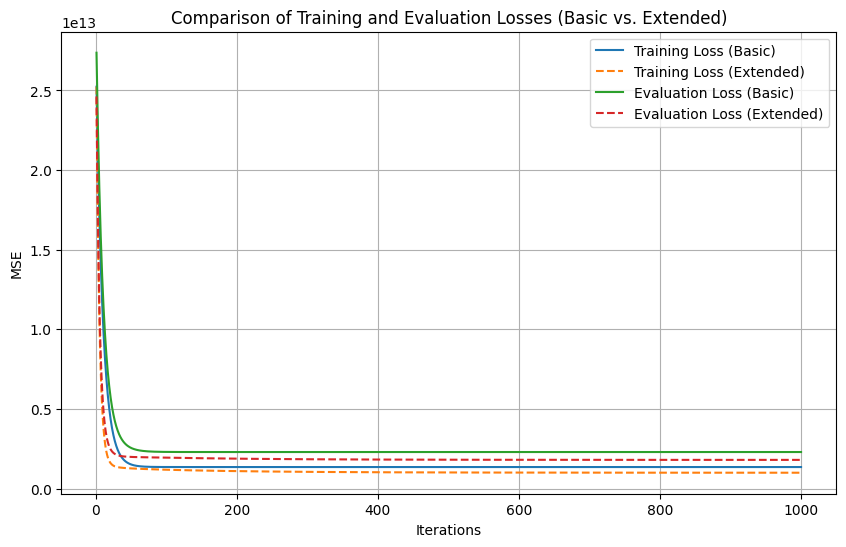

Best Parameters for Basic Model (Theta): [4744533.74907449  669669.62933034  111527.30102236  595247.30781532
  429101.96588984  290656.73479686]

Best Parameters for Extended Model (Theta): [3676571.48418433  507833.30198508   61207.9810817   557350.82236283
  364929.72522268  209353.59089292  498044.38832272  242595.62004985
  440619.78467125  687702.03318785  814233.75479129  624131.46501812]


In [26]:
### ---------------------------- PROBLEM 1.b ---------------------------- ###
# Select relevant columns for extended model
features_extended = [
    'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
    'mainroad', 'guestroom', 'basement', 'hotwaterheating',
    'airconditioning', 'prefarea'
]


# One-hot encode categorical variables
housing_data_encoded = pd.get_dummies(housing_data, columns=[
    'mainroad', 'guestroom', 'basement', 'hotwaterheating',
    'airconditioning', 'prefarea'
], drop_first=True)


# Correct the feature list after one-hot encoding
features_encoded = [
    'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
    'mainroad_yes', 'guestroom_yes', 'basement_yes',
    'hotwaterheating_yes', 'airconditioning_yes', 'prefarea_yes'
]


# Define X and y with extended features
X_extended = housing_data_encoded[features_encoded].values
y_extended = housing_data_encoded[target].values.reshape(-1, 1)


# Convert data types to float after encoding
X_extended = X_extended.astype(float)
y_extended = y_extended.astype(float)


# Standardize the numerical features
scaler_extended = StandardScaler()
X_extended[:, :5] = scaler_extended.fit_transform(X_extended[:, :5])


# Split data into 80% training and 20% evaluation sets
X_train_ext, X_eval_ext, y_train_ext, y_eval_ext = train_test_split(
    X_extended, y_extended, test_size=0.2, random_state=42
)


# Run gradient descent for extended model
theta_best_ext, train_loss_ext, eval_loss_ext = gradient_descent(
    X_train_ext, y_train_ext, X_eval_ext, y_eval_ext, learning_rate=0.05, iterations=1000
)


### ---------------------------- COMPARISON GRAPH ---------------------------- ###
# Plot comparison of training and evaluation losses for both models
plt.figure(figsize=(10, 6))


# Plot training loss for both models
plt.plot(range(1, 1001), train_loss, label="Training Loss (Basic)")
plt.plot(range(1, 1001), train_loss_ext, label="Training Loss (Extended)", linestyle="--")


# Plot evaluation loss for both models
plt.plot(range(1, 1001), eval_loss, label="Evaluation Loss (Basic)")
plt.plot(range(1, 1001), eval_loss_ext, label="Evaluation Loss (Extended)", linestyle="--")


plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.title("Comparison of Training and Evaluation Losses (Basic vs. Extended)")
plt.legend()
plt.grid(True)
plt.show()


### ---------------------------- DISPLAY BEST PARAMETERS ---------------------------- ###
print("Best Parameters for Basic Model (Theta):", theta_best.ravel())
print("\nBest Parameters for Extended Model (Theta):", theta_best_ext.ravel())


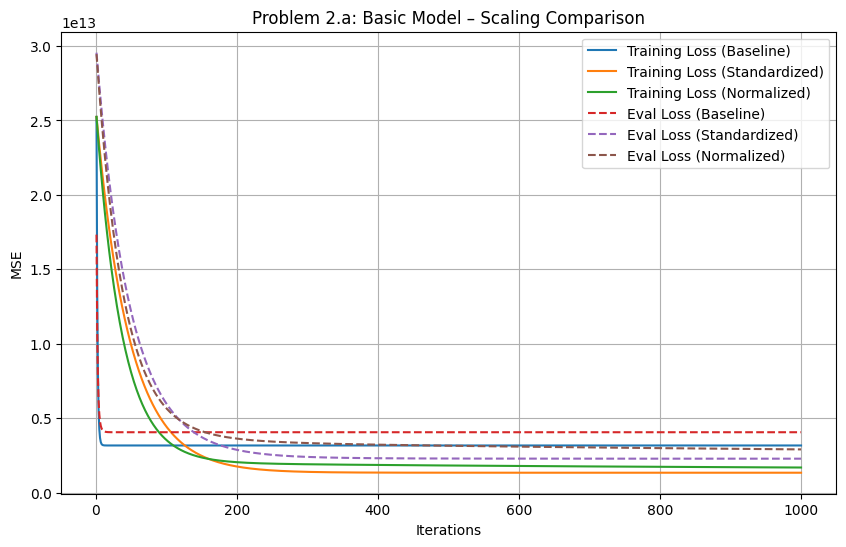

Best Parameters for Baseline (Basic): [  4.01448962 837.91817466  14.62444416   7.79441183  12.13908431
   3.13261148]
Best Parameters for Standardized (Basic): [4706324.19866291  679784.16108007  113853.85524508  564996.83769347
  423850.53400103  288572.51539751]
Best Parameters for Normalized (Basic): [3003436.32770682 1594381.78836447 1471384.436388   1121038.15840208
 1433551.94486797 1336236.55962768]


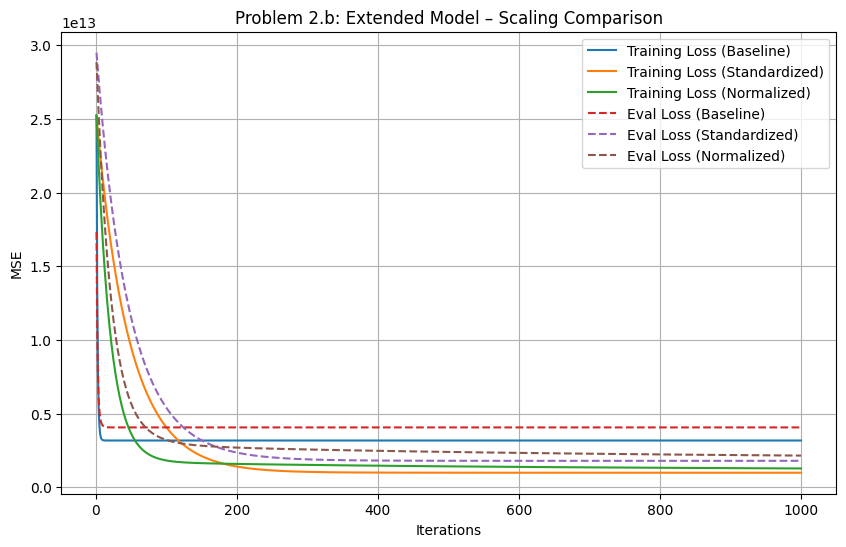

Best Parameters for Baseline (Extended): [4.01448681e+00 8.37917199e+02 1.46244351e+01 7.79440799e+00
 1.21390782e+01 3.13260981e+00 3.43727661e+00 1.25826965e+00
 2.81834376e+00 5.09686635e-01 3.21974528e+00 1.55078495e+00]
Best Parameters for Standardized (Extended): [4706324.19866291  522087.04752932   60657.90506096  528889.87497578
  363380.87926715  211389.44518885  145047.7854994    94723.52054041
  206441.94710708  156143.91037252  373875.28580191  269574.36203818]
Best Parameters for Normalized (Extended): [1861854.43429587 1047716.9445988  1025451.45062143  959866.17993833
 1097073.55735408  899593.3259709  1064537.68543662  382870.51832834
  444662.62244918  388291.07547095 1030076.98483069  582915.49369803]


In [27]:
### ---------------------------- PROBLEM 2.a ---------------------------- ###
# Define features and target for the basic model
features_basic = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
target = 'price'


# Extract X and y from the dataset
X_basic = housing_data[features_basic].values
y_basic = housing_data[target].values.reshape(-1, 1)


# Split data into 80% training and 20% evaluation sets
from sklearn.model_selection import train_test_split
X_train, X_eval, y_train, y_eval = train_test_split(X_basic, y_basic, test_size=0.2, random_state=42)


# Gradient Descent Function
def gradient_descent(X, y, X_eval, y_eval, learning_rate, iterations=1000):
    m, n = X.shape
    theta = np.zeros((n + 1, 1))  # initialize parameters (including intercept)
    X_bias = np.c_[np.ones((m, 1)), X]  # add bias term
    train_loss = []
    eval_loss = []
    for i in range(iterations):
        predictions = np.dot(X_bias, theta)
        errors = predictions - y
        gradients = (1 / m) * np.dot(X_bias.T, errors)
        theta -= learning_rate * gradients
        train_loss.append(np.mean(errors**2))
       
        m_eval = X_eval.shape[0]
        X_eval_bias = np.c_[np.ones((m_eval, 1)), X_eval]
        eval_predictions = np.dot(X_eval_bias, theta)
        eval_errors = eval_predictions - y_eval
        eval_loss.append(np.mean(eval_errors**2))
    return theta, train_loss, eval_loss


# ----------------- Baseline Training (No Scaling) -----------------
# Use a very low learning rate for baseline training
theta_base, train_loss_base, eval_loss_base = gradient_descent(
    X_train, y_train, X_eval, y_eval, learning_rate=1e-8, iterations=1000
)


# ----------------- Standardization -----------------
from sklearn.preprocessing import StandardScaler
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_eval_std = scaler_std.transform(X_eval)
theta_std, train_loss_std, eval_loss_std = gradient_descent(
    X_train_std, y_train, X_eval_std, y_eval, learning_rate=0.01, iterations=1000
)


# ----------------- Normalization -----------------
from sklearn.preprocessing import MinMaxScaler
scaler_norm = MinMaxScaler()
X_train_norm = scaler_norm.fit_transform(X_train)
X_eval_norm = scaler_norm.transform(X_eval)
theta_norm, train_loss_norm, eval_loss_norm = gradient_descent(
    X_train_norm, y_train, X_eval_norm, y_eval, learning_rate=0.01, iterations=1000
)


# ----------------- Plotting the Losses -----------------
plt.figure(figsize=(10,6))
# Plot training losses
plt.plot(range(1, 1001), train_loss_base, label="Training Loss (Baseline)")
plt.plot(range(1, 1001), train_loss_std, label="Training Loss (Standardized)")
plt.plot(range(1, 1001), train_loss_norm, label="Training Loss (Normalized)")
# Plot evaluation losses (dashed lines)
plt.plot(range(1, 1001), eval_loss_base, linestyle="--", label="Eval Loss (Baseline)")
plt.plot(range(1, 1001), eval_loss_std, linestyle="--", label="Eval Loss (Standardized)")
plt.plot(range(1, 1001), eval_loss_norm, linestyle="--", label="Eval Loss (Normalized)")
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.title("Problem 2.a: Basic Model – Scaling Comparison")
plt.legend()
plt.grid(True)
plt.show()


# Display best parameters
print("Best Parameters for Baseline (Basic):", theta_base.ravel())
print("Best Parameters for Standardized (Basic):", theta_std.ravel())
print("Best Parameters for Normalized (Basic):", theta_norm.ravel())





### ---------------------------- PROBLEM 2.b ---------------------------- ###
# Define extended model features and target
features_extended = [
    'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
    'mainroad', 'guestroom', 'basement', 'hotwaterheating',
    'airconditioning', 'prefarea'
]
target = 'price'


# One-hot encode categorical variables for the extended model
housing_data_encoded = pd.get_dummies(housing_data, columns=[
    'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'
], drop_first=True)


# Update feature list after encoding
features_encoded = [
    'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
    'mainroad_yes', 'guestroom_yes', 'basement_yes',
    'hotwaterheating_yes', 'airconditioning_yes', 'prefarea_yes'
]


# Extract X and y for the extended model
X_extended = housing_data_encoded[features_encoded].values.astype(float)
y_extended = housing_data_encoded[target].values.reshape(-1, 1).astype(float)


# Split data into 80% training and 20% evaluation sets
from sklearn.model_selection import train_test_split
X_train_ext, X_eval_ext, y_train_ext, y_eval_ext = train_test_split(
    X_extended, y_extended, test_size=0.2, random_state=42
)


# Gradient Descent Function (same as before)
def gradient_descent(X, y, X_eval, y_eval, learning_rate, iterations=1000):
    m, n = X.shape
    theta = np.zeros((n + 1, 1))
    X_bias = np.c_[np.ones((m, 1)), X]
    train_loss = []
    eval_loss = []
    for i in range(iterations):
        predictions = np.dot(X_bias, theta)
        errors = predictions - y
        gradients = (1 / m) * np.dot(X_bias.T, errors)
        theta -= learning_rate * gradients
        train_loss.append(np.mean(errors**2))
       
        m_eval = X_eval.shape[0]
        X_eval_bias = np.c_[np.ones((m_eval, 1)), X_eval]
        eval_predictions = np.dot(X_eval_bias, theta)
        eval_errors = eval_predictions - y_eval
        eval_loss.append(np.mean(eval_errors**2))
    return theta, train_loss, eval_loss


# ----------------- Baseline Training (No Scaling) -----------------
# Use a very low learning rate for baseline training
theta_base_ext, train_loss_base_ext, eval_loss_base_ext = gradient_descent(
    X_train_ext, y_train_ext, X_eval_ext, y_eval_ext, learning_rate=1e-8, iterations=1000
)


# ----------------- Standardization -----------------
from sklearn.preprocessing import StandardScaler
scaler_std_ext = StandardScaler()
X_train_std_ext = scaler_std_ext.fit_transform(X_train_ext)
X_eval_std_ext = scaler_std_ext.transform(X_eval_ext)
theta_std_ext, train_loss_std_ext, eval_loss_std_ext = gradient_descent(
    X_train_std_ext, y_train_ext, X_eval_std_ext, y_eval_ext, learning_rate=0.01, iterations=1000
)


# ----------------- Normalization -----------------
from sklearn.preprocessing import MinMaxScaler
scaler_norm_ext = MinMaxScaler()
X_train_norm_ext = scaler_norm_ext.fit_transform(X_train_ext)
X_eval_norm_ext = scaler_norm_ext.transform(X_eval_ext)
theta_norm_ext, train_loss_norm_ext, eval_loss_norm_ext = gradient_descent(
    X_train_norm_ext, y_train_ext, X_eval_norm_ext, y_eval_ext, learning_rate=0.01, iterations=1000
)


# ----------------- Plotting the Losses -----------------
plt.figure(figsize=(10,6))
# Plot training losses
plt.plot(range(1, 1001), train_loss_base_ext, label="Training Loss (Baseline)")
plt.plot(range(1, 1001), train_loss_std_ext, label="Training Loss (Standardized)")
plt.plot(range(1, 1001), train_loss_norm_ext, label="Training Loss (Normalized)")
# Plot evaluation losses (dashed lines)
plt.plot(range(1, 1001), eval_loss_base_ext, linestyle="--", label="Eval Loss (Baseline)")
plt.plot(range(1, 1001), eval_loss_std_ext, linestyle="--", label="Eval Loss (Standardized)")
plt.plot(range(1, 1001), eval_loss_norm_ext, linestyle="--", label="Eval Loss (Normalized)")
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.title("Problem 2.b: Extended Model – Scaling Comparison")
plt.legend()
plt.grid(True)
plt.show()


# Display best parameters for the extended model
print("Best Parameters for Baseline (Extended):", theta_base_ext.ravel())
print("Best Parameters for Standardized (Extended):", theta_std_ext.ravel())
print("Best Parameters for Normalized (Extended):", theta_norm_ext.ravel())


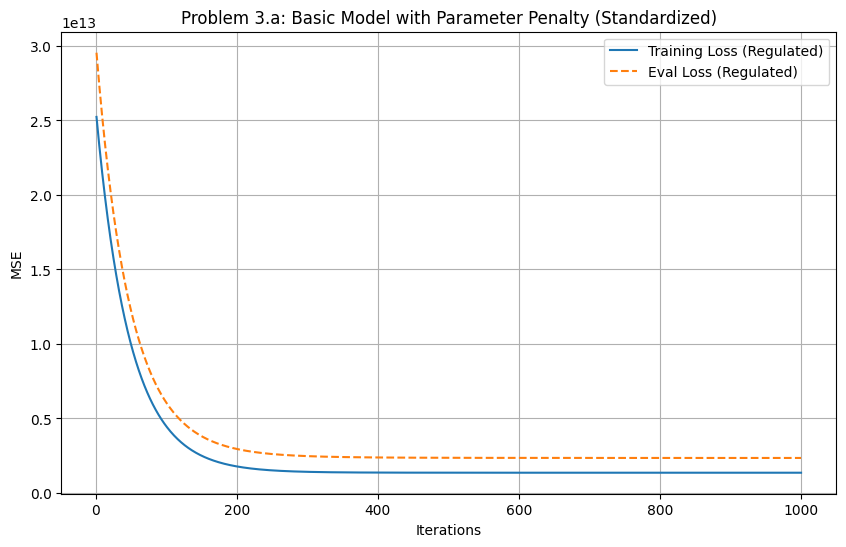

Best Parameters (Basic, with Penalty): [4706324.19866291  625314.79031653  137323.3589828   525170.1901353
  391954.13026882  284434.23031367]


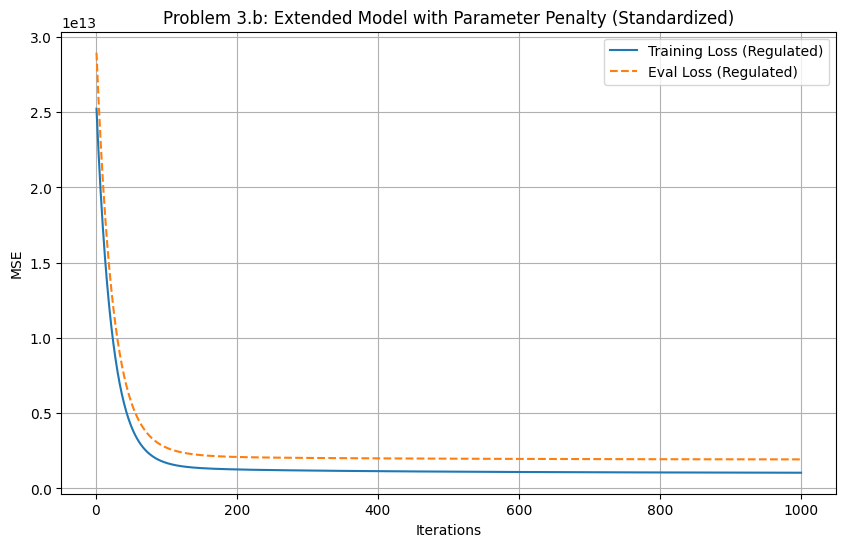

Best Parameters for Extended Model (with Penalty): [3374834.44449859  459031.67969867  109555.52834539  497819.49659828
  331053.40308523  207204.5053926   874876.64152065  244428.23022984
  431000.74729707  231417.32890368  644520.74396718  435997.98116178]


In [28]:
### ---------------------------- PROBLEM 3.a ---------------------------- ###
# Define features and target for the basic model
features_basic = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
target = 'price'


# Extract X and y
X_basic = housing_data[features_basic].values
y_basic = housing_data[target].values.reshape(-1, 1)


# Split data into 80% training and 20% evaluation sets
from sklearn.model_selection import train_test_split
X_train, X_eval, y_train, y_eval = train_test_split(X_basic, y_basic, test_size=0.2, random_state=42)


# Standardize the features (best scaling approach from 2.a)
from sklearn.preprocessing import StandardScaler
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_eval_std = scaler_std.transform(X_eval)


# Set the regularization parameter (lambda). Adjust as needed.
lambda_penalty = 0.1


# Define a gradient descent function with L2 regularization (parameter penalty)
def gradient_descent_reg(X, y, X_eval, y_eval, learning_rate=0.01, iterations=1000, lambda_penalty=0.1):
    m, n = X.shape
    theta = np.zeros((n + 1, 1))  # Initialize parameters (including intercept)
    X_bias = np.c_[np.ones((m, 1)), X]  # Add bias term
   
    train_loss = []
    eval_loss = []
   
    for i in range(iterations):
        # Predictions
        predictions = np.dot(X_bias, theta)
        errors = predictions - y
       
        # Compute the gradient (without penalty)
        gradient = (1 / m) * np.dot(X_bias.T, errors)
       
        # Add L2 penalty to gradients for j >= 1 (do not penalize intercept)
        gradient[1:] += lambda_penalty * theta[1:]
       
        # Update parameters
        theta -= learning_rate * gradient
       
        # Compute loss as simple MSE (without penalty) for monitoring
        train_loss.append(np.mean(errors**2))
        m_eval = X_eval.shape[0]
        X_eval_bias = np.c_[np.ones((m_eval, 1)), X_eval]
        eval_predictions = np.dot(X_eval_bias, theta)
        eval_errors = eval_predictions - y_eval
        eval_loss.append(np.mean(eval_errors**2))
       
    return theta, train_loss, eval_loss


# Run gradient descent with regularization on standardized data
theta_reg, train_loss_reg, eval_loss_reg = gradient_descent_reg(
    X_train_std, y_train, X_eval_std, y_eval, learning_rate=0.01, iterations=1000, lambda_penalty=lambda_penalty
)


# Plot training and evaluation losses
plt.figure(figsize=(10,6))
plt.plot(range(1, 1001), train_loss_reg, label="Training Loss (Regulated)")
plt.plot(range(1, 1001), eval_loss_reg, linestyle="--", label="Eval Loss (Regulated)")
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.title("Problem 3.a: Basic Model with Parameter Penalty (Standardized)")
plt.legend()
plt.grid(True)
plt.show()


# Display best parameters
print("Best Parameters (Basic, with Penalty):", theta_reg.ravel())


# ----------------------------------------------------------------------------
# Explanation:
# By adding an L2 penalty, we modify the parameter update to discourage large weights.
# The MSE loss (without the penalty term) is used for evaluation.
# Comparing these results to Problem 2.a, you can observe if the penalty
# leads to more stable or smaller parameter values and whether it improves generalization.





### ---------------------------- PROBLEM 3.b ---------------------------- ###
# Define extended model features and target
features_extended = [
    'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
    'mainroad', 'guestroom', 'basement', 'hotwaterheating',
    'airconditioning', 'prefarea'
]
target = 'price'


# One-hot encode categorical variables for the extended model
housing_data_encoded = pd.get_dummies(housing_data, columns=[
    'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'
], drop_first=True)


# Update feature list to include the dummy variable names after encoding
features_encoded = [
    'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
    'mainroad_yes', 'guestroom_yes', 'basement_yes',
    'hotwaterheating_yes', 'airconditioning_yes', 'prefarea_yes'
]


# Extract X and y for the extended model
X_extended = housing_data_encoded[features_encoded].values.astype(float)
y_extended = housing_data_encoded[target].values.reshape(-1, 1).astype(float)


# Split data into 80% training and 20% evaluation sets
from sklearn.model_selection import train_test_split
X_train_ext, X_eval_ext, y_train_ext, y_eval_ext = train_test_split(
    X_extended, y_extended, test_size=0.2, random_state=42
)


# Standardize the numerical features in the extended model
from sklearn.preprocessing import StandardScaler
scaler_std_ext = StandardScaler()
# For the extended model, assume the first five columns are numerical;
# the remaining are dummy variables (which are already 0/1)
X_train_std_ext = X_train_ext.copy()
X_eval_std_ext = X_eval_ext.copy()
X_train_std_ext[:, :5] = scaler_std_ext.fit_transform(X_train_ext[:, :5])
X_eval_std_ext[:, :5] = scaler_std_ext.transform(X_eval_ext[:, :5])


# Set the regularization parameter (lambda)
lambda_penalty_ext = 0.1


# Use the same gradient descent function with regularization as in 3.a
def gradient_descent_reg(X, y, X_eval, y_eval, learning_rate=0.01, iterations=1000, lambda_penalty=0.1):
    m, n = X.shape
    theta = np.zeros((n + 1, 1))
    X_bias = np.c_[np.ones((m, 1)), X]
    train_loss = []
    eval_loss = []
    for i in range(iterations):
        predictions = np.dot(X_bias, theta)
        errors = predictions - y
        gradient = (1 / m) * np.dot(X_bias.T, errors)
        gradient[1:] += lambda_penalty * theta[1:]
        theta -= learning_rate * gradient
        train_loss.append(np.mean(errors**2))
       
        m_eval = X_eval.shape[0]
        X_eval_bias = np.c_[np.ones((m_eval, 1)), X_eval]
        eval_predictions = np.dot(X_eval_bias, theta)
        eval_errors = eval_predictions - y_eval
        eval_loss.append(np.mean(eval_errors**2))
    return theta, train_loss, eval_loss


# Run gradient descent with regularization for the extended model
theta_reg_ext, train_loss_reg_ext, eval_loss_reg_ext = gradient_descent_reg(
    X_train_std_ext, y_train_ext, X_eval_std_ext, y_eval_ext,
    learning_rate=0.01, iterations=1000, lambda_penalty=lambda_penalty_ext
)


# Plot training and evaluation losses for the extended model
plt.figure(figsize=(10,6))
plt.plot(range(1, 1001), train_loss_reg_ext, label="Training Loss (Regulated)")
plt.plot(range(1, 1001), eval_loss_reg_ext, linestyle="--", label="Eval Loss (Regulated)")
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.title("Problem 3.b: Extended Model with Parameter Penalty (Standardized)")
plt.legend()
plt.grid(True)
plt.show()


# Display best parameters for the extended model
print("Best Parameters for Extended Model (with Penalty):", theta_reg_ext.ravel())


# ----------------------------------------------------------------------------
# Explanation:
# The regularized training process penalizes large parameter values, which can help prevent overfitting.
# The MSE loss used for monitoring remains unchanged.
# By comparing these curves to those from Problem 2.b, you can assess whether the regularization
# improves training stability or generalization performance.
